### (x,y) 到$ 直线Ax+By+C的距离为\ \frac{|Ax+By+C|}{\sqrt{A^2+B^2}}$
### 拓展到n维空间 $\theta^T x_b=0 ---> w^Tx+b=0$
### $\frac{w^Tx+b}{\|w\|}, \|w\|=\sqrt{w^2_1+w^2_2+\dots+w^2_n}$

# Hard Margin SVM :
### $min\frac{1}{2}\|w\|^2$
### $s.t.\ \ \ y^{(i)}(w^Tx^{(i)}+b) \geq 1$

# Soft Margin SVM :
### $min\frac{1}{2}\|w\|^2 + C \sum_{i=1}^m\zeta_i$  , 多了一个L1正则化项(C是一个新的超参数)
C越小,容错空间越大, 越hard
### $min\frac{1}{2}\|w\|^2 + C \sum_{i=1}^m\zeta_i^2$  , L2正则
### $s.t.\ \ \ y^{(i)}(w^Tx^{(i)}+b) \geq 1-\zeta_i$
#### $\zeta_i \geq 0$

# 注意!使用SVM要做数据标准化处理

# Scikit-learn中的SVM

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y<2, :2]
y = y[y<2]

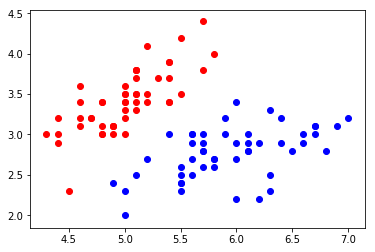

In [9]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit(X)
X_standard = standard_scaler.transform(X)

In [11]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)  #hard svm
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [12]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

C:\Users\fangyang\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


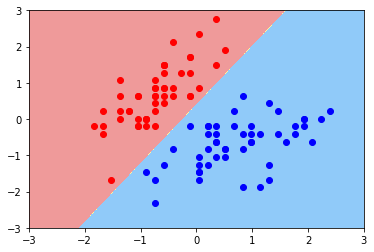

In [13]:
plot_decision_boundary(svc, axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1], color='red')
plt.scatter(X_standard[y==1,0], X_standard[y==1,1], color='blue')
plt.show()

In [14]:
# 把C变小, 更soft, 容错空间更大
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

C:\Users\fangyang\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


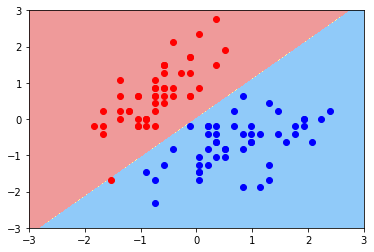

In [15]:
plot_decision_boundary(svc2, axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1], color='red')
plt.scatter(X_standard[y==1,0], X_standard[y==1,1], color='blue')
plt.show()

In [16]:
svc.coef_

array([[ 4.03239157, -2.49293474]])

In [17]:
svc.intercept_

array([0.95363048])

In [18]:
def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))
    )
    x_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0
    # x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

C:\Users\fangyang\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


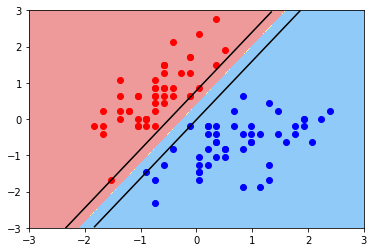

In [19]:
plot_svc_decision_boundary(svc, axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1], color='red')
plt.scatter(X_standard[y==1,0], X_standard[y==1,1], color='blue')
plt.show()

C:\Users\fangyang\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


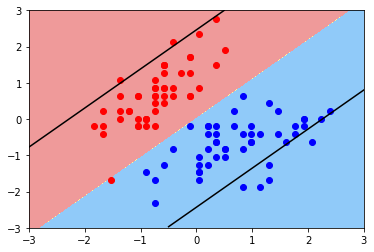

In [20]:
plot_svc_decision_boundary(svc2, axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1], color='red')
plt.scatter(X_standard[y==1,0], X_standard[y==1,1], color='blue')
plt.show()